<a href="https://colab.research.google.com/github/NoRoboto/FSDDScatteringClassifier/blob/master/FSDDScattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kymatio

In [5]:
! pip install tqdm

In [0]:
# Since kymatio handles PyTorch arrays, we first import torch.
import torch
# To handle audio file I/O, we import os and scipy.io.wavfile.
import os
import scipy.io.wavfile as wav
# Plot the calculated scattering coefficients.
import matplotlib.pyplot as plt
# import the Scattering1D class from the scattering package and the fetch_fsdd function from scattering.datasets. 
# The Scattering1D class is what lets us calculate the scattering transform, while the fetch_fsdd function downloads the FSDD, if needed.
from kymatio import Scattering1D
from kymatio.datasets import fetch_fsdd
## logging process
from tqdm import tqdm
## array
import numpy as np

In [0]:
J = 6 # Here, we set J = 6 to get an averaging, or maximum, scattering scale of 2**6 = 64 samples.
Q = 16 # the number of wavelets per octave, Q, to 16. This lets us resolve frequencies at a resolution of 1/16 octaves.

convert it to a PyTorch Tensor, normalize it, and reshape it to the form (B, C, T), where B is the batch size, C is the number of channels, and T is the number of samples in the recording. In our case, we have only one signal in our batch, so B = 1. We also have a single channel, so C = 1. Note that C is almost always 1, for input Tensors as this axis indexes the different scattering coefficients.


In [8]:
info_dataset = fetch_fsdd(verbose=True)

Cloning git repository at  https://github.com/Jakobovski/free-spoken-digit-dataset.git


## Original Signals

In [0]:
def plot_classes(dataset, dataset_path, classes, speakers):
    fig = plt.figure(figsize=(64, 8))
    for index, speaker in enumerate(speakers):
        for j in range(1, classes + 1):
            file_name = str(j - 1) + '_' + speaker + '_' + '0.wav'
            
            file_path = os.path.join(dataset_path, file_name)
            _, x = wav.read(file_path)
            
            x = torch.from_numpy(x).float()
            x /= x.abs().max()
            x = x.view(1, -1)
            
            ax = fig.add_subplot(len(speakers), classes, j + (index * classes))
            ax.set_title(speaker + ' - ' + str(j - 1))
            
            plt.plot(x[0,:].numpy())
    
    plt.tight_layout()
    plt.show()

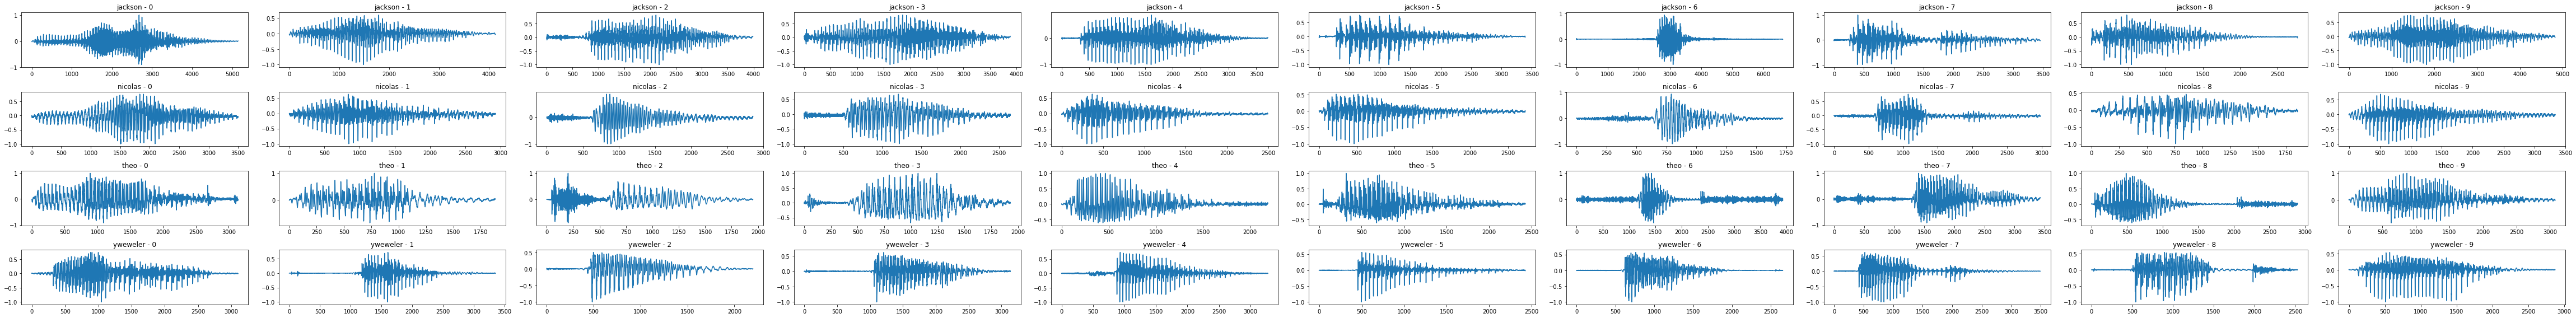

In [0]:
mask_classes_speakers = ['jackson', 'nicolas', 'theo', 'yweweler']
plot_classes(info_dataset['files'], info_dataset['path_dataset'], 10, mask_classes_speakers)

##Scattering Plot data

In [0]:
def plot_scattering_classes(dataset, dataset_path, classes, speakers, order):
    fig = plt.figure(figsize=(64, 8))
    pbar = tqdm(total=(classes * len(speakers)))
    for index, speaker in enumerate(speakers):
        for j in range(1, classes + 1):
            file_name = str(j - 1) + '_' + speaker + '_' + '0.wav'
            
            file_path = os.path.join(dataset_path, file_name)
            _, x = wav.read(file_path)
            
            x = torch.from_numpy(x).float()
            x /= x.abs().max()
            x = x.view(1, -1)
            
            ax = fig.add_subplot(len(speakers), classes, j + (index * classes))
            ax.set_title('Scattering order ' + str(order) + ' - ' + speaker + ' - ' + str(j - 1))
            
            T = x.shape[-1]
            
            scattering = Scattering1D(J, T, Q)
            Sx = scattering.forward(x)
            
            meta = Scattering1D.compute_meta_scattering(J, Q)
            custom_order = (meta['order'] == order)
            
            if order > 0:
              plt.imshow(Sx[0, custom_order,:].numpy(), aspect='auto')
            else:
              plt.plot(Sx[0, custom_order, :].numpy().ravel())
            
            pbar.update(1)

    pbar.close()
    plt.tight_layout()
    plt.show()

## Scattering orders


100%|██████████| 40/40 [00:12<00:00,  3.38it/s]


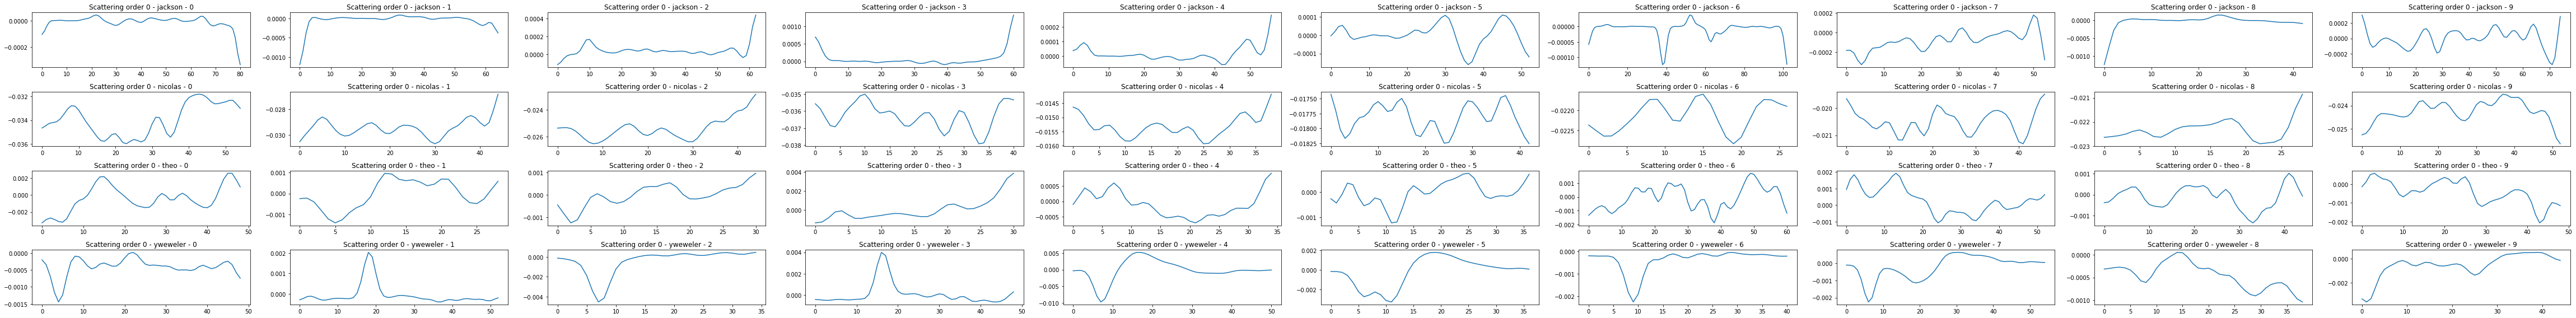

In [0]:
plot_scattering_classes(info_dataset['files'], info_dataset['path_dataset'], 10, mask_classes_speakers, 0)




  0%|          | 0/40 [00:00<?, ?it/s]


  2%|▎         | 1/40 [00:00<00:15,  2.56it/s]


  5%|▌         | 2/40 [00:00<00:14,  2.55it/s]


  8%|▊         | 3/40 [00:01<00:13,  2.66it/s]


 10%|█         | 4/40 [00:01<00:13,  2.76it/s]


 12%|█▎        | 5/40 [00:01<00:12,  2.84it/s]


 15%|█▌        | 6/40 [00:02<00:11,  2.88it/s]


 18%|█▊        | 7/40 [00:02<00:14,  2.34it/s]


 20%|██        | 8/40 [00:03<00:12,  2.50it/s]


 22%|██▎       | 9/40 [00:03<00:11,  2.63it/s]


 25%|██▌       | 10/40 [00:03<00:11,  2.55it/s]


 28%|██▊       | 11/40 [00:04<00:10,  2.67it/s]


 30%|███       | 12/40 [00:04<00:10,  2.77it/s]


 32%|███▎      | 13/40 [00:04<00:09,  2.83it/s]


 35%|███▌      | 14/40 [00:05<00:08,  3.11it/s]


 38%|███▊      | 15/40 [00:05<00:07,  3.35it/s]


 40%|████      | 16/40 [00:05<00:07,  3.25it/s]


 42%|████▎     | 17/40 [00:05<00:06,  3.60it/s]


 45%|████▌     | 18/40 [00:06<00:06,  3.44it/s]


 48%|████▊     | 19/40 [00:06<00:05,  3.70it/s]


 50%|█████     

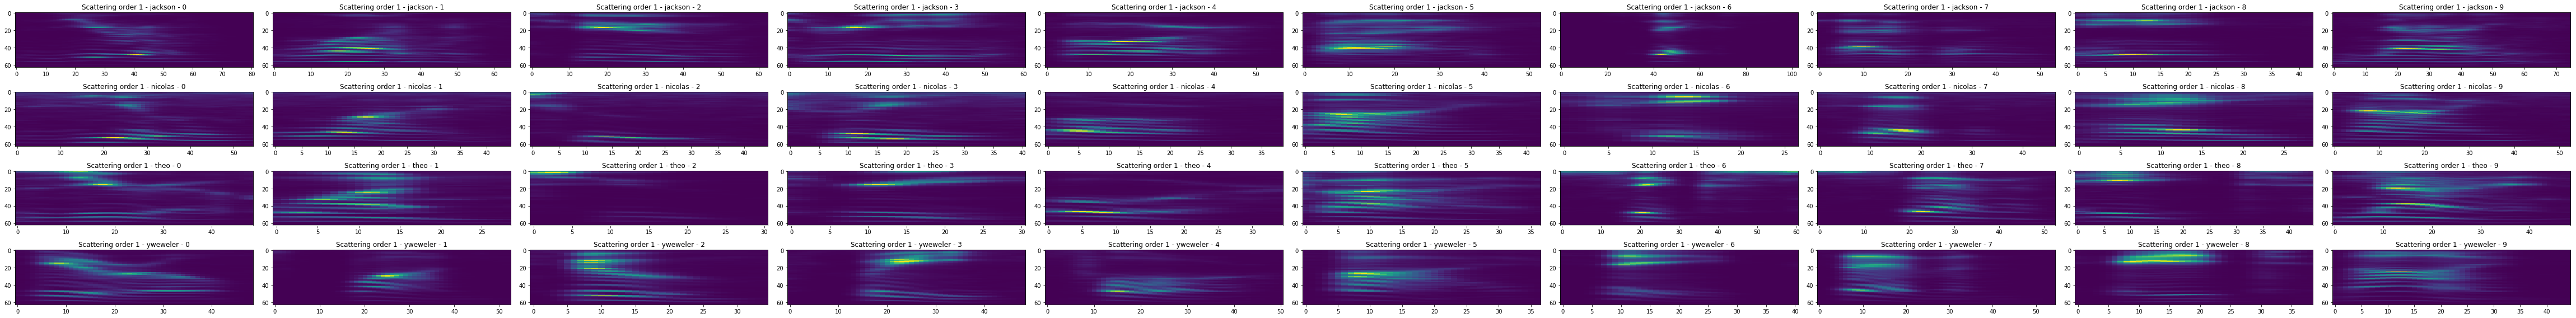

In [0]:
plot_scattering_classes(info_dataset['files'], info_dataset['path_dataset'], 10, mask_classes_speakers, 1)



  0%|          | 0/40 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:00<00:15,  2.54it/s]

  5%|▌         | 2/40 [00:00<00:15,  2.52it/s]

  8%|▊         | 3/40 [00:01<00:13,  2.65it/s]

 10%|█         | 4/40 [00:01<00:13,  2.74it/s]

 12%|█▎        | 5/40 [00:01<00:12,  2.73it/s]

 15%|█▌        | 6/40 [00:02<00:12,  2.81it/s]

 18%|█▊        | 7/40 [00:02<00:14,  2.34it/s]

 20%|██        | 8/40 [00:03<00:12,  2.50it/s]

 22%|██▎       | 9/40 [00:03<00:11,  2.64it/s]

 25%|██▌       | 10/40 [00:03<00:11,  2.59it/s]

 28%|██▊       | 11/40 [00:04<00:10,  2.70it/s]

 30%|███       | 12/40 [00:04<00:09,  2.80it/s]

 32%|███▎      | 13/40 [00:04<00:09,  2.87it/s]

 35%|███▌      | 14/40 [00:05<00:08,  3.14it/s]

 38%|███▊      | 15/40 [00:05<00:07,  3.39it/s]

 40%|████      | 16/40 [00:05<00:07,  3.27it/s]

 42%|████▎     | 17/40 [00:05<00:06,  3.58it/s]

 45%|████▌     | 18/40 [00:06<00:06,  3.37it/s]

 48%|████▊     | 19/40 [00:06<00:05,  3.72it/s]

 50%|█████     | 20/40 [00:06<00:05,

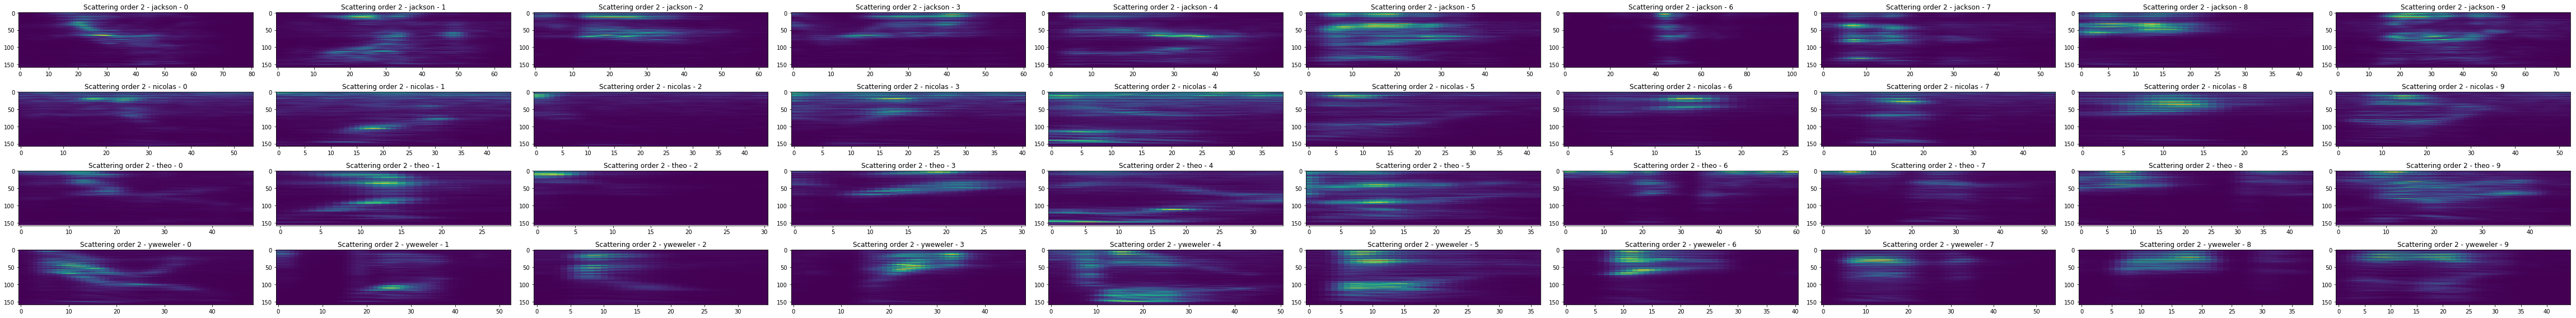

In [0]:
plot_scattering_classes(info_dataset['files'], info_dataset['path_dataset'], 10, mask_classes_speakers, 2)

In [0]:
def load_raw_data_to_tensor(dataset, dataset_path):
    scattering_array =[]
    samples_data = []
    sample_data_rates = []
    file_names = []
    total_samples = len(dataset)
    
    pbar = tqdm(total=total_samples)
    for index, file_name in enumerate(dataset):

      file_path = os.path.join(dataset_path, file_name)

      sample_rate, samples = wav.read(file_path)
      samples_data.append(samples)
      sample_data_rates.append(sample_rate)

      x = torch.from_numpy(samples).float()
      x /= x.abs().max()
      x = x.view(1, -1)

      T = x.shape[-1]

      scattering = Scattering1D(J, T, Q)
      Sx = scattering.forward(x)

      scattering_array.append(Sx)

      file_names.append(file_name)
      
      pbar.update(1)

    pbar.close()
    return samples_data, sample_data_rates, file_names, scattering_array

In [12]:
wav_data, sample_rates, file_names, scattering_data = load_raw_data_to_tensor(info_dataset['files'], info_dataset['path_dataset'])

100%|██████████| 2000/2000 [09:50<00:00,  3.45it/s]


In [0]:
def filter_scattering_data_order(scattering_data, order):
  filter_data = []
  
  for data in scattering_data: 
    meta = Scattering1D.compute_meta_scattering(J, Q)
    custom_order = (meta['order'] == 1)
    
    dat = data[0, custom_order, :].numpy()
    pad_width = 300 - dat.shape[1]
    dat = np.pad(dat, pad_width=((0, 0), (0, pad_width)), mode='constant')

    filter_data.append(dat)
    
  #return np.asarray(filter_data)
  return np.asanyarray(filter_data)

In [0]:
X = filter_scattering_data_order(scattering_data, 2)

In [145]:
X.shape

(2000, 63, 300)

## ML model

In [0]:
from time import time
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
get_labels = lambda file_name : file_name.split('_')[0]
labels = list(map(get_labels, file_names))

In [0]:
n_classes = len(np.unique(labels))
n_samples, nx, ny = X.shape
n_features = nx * ny

encoder = preprocessing.LabelEncoder() # One Hoc Encode
y = encoder.fit_transform(labels)

X = X.reshape(n_samples, n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [158]:
print("Fitting the classifier to the training set")
t0 = time()

parameters = {'solver': ['adam'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(3, 5), 'hidden_layer_sizes':[(32), (64), (16, 32), (128), (64, 128, 512), (512), (512, 64, 128), (8, 16)], 'random_state':[0, 1], 'early_stopping':[True]}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs = -1, cv = 3)
clf = clf.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best applied model params:")
print(clf.best_params_)
print("Train Score: ")
print(clf.score(X_train, y_train))

Fitting the classifier to the training set


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


done in 6248.047s
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(512, 64, 128), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best applied model params:
{'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (512, 64, 128), 'max_iter': 100, 'random_state': 1, 'solver': 'adam'}
Train Score: 
0.9886666666666667


In [159]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

target_names = ['digit_' + x for x in np.unique(labels)] 

print("Predicting digits on the test set")
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Predicting digits on the test set
              precision    recall  f1-score   support

     digit_0       0.92      1.00      0.96        48
     digit_1       0.91      0.91      0.91        43
     digit_2       0.91      0.94      0.93        54
     digit_3       0.94      0.90      0.92        52
     digit_4       0.94      0.89      0.91        54
     digit_5       0.97      1.00      0.98        58
     digit_6       0.92      0.94      0.93        48
     digit_7       0.95      0.98      0.96        42
     digit_8       1.00      0.98      0.99        48
     digit_9       1.00      0.92      0.96        53

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Confusion matrix
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  3  0  0  1  0  0]
 [ 0  0 51  3  0  0  0  0  0  0]
 [ 0  0  4 47  0  0  1  0  0  0]
 [ 2  3  0  0 48  1  0  0  0  0]
 [ 0  0  0  0  0 58  0  0